<a href="https://colab.research.google.com/github/sashavorot/SHIFT-intensive/blob/main/deep_n_diggers_1st_note_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
target_name = 'price_doc'

# # Загрузка данных
df = pd.read_csv('./gdrive/MyDrive/SHIFT_SUMMER/train.csv', index_col=0)
x = df.drop(columns=[target_name])
y = df[target_name]




In [ ]:
df.shape

(21329, 51)

In [ ]:
print(df.shape)
df.info()

(21329, 51)
<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_cou

In [ ]:
df.columns #признаки, с которыми предстоит работать

Index(['full_sq', 'floor', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'raion_popul', 'indust_part', 'sport_objects_raion',
       'shopping_centers_raion', 'radiation_raion', 'build_count_block',
       'build_count_brick', 'build_count_monolith', 'metro_min_avto',
       'school_km', 'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km', 'ID_railroad_station_avto', 'mkad_km',
       'ttk_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'power_transmission_line_km', 'market_shop_km', 'fitness_km',
       'stadium_km', 'basketball_km', 'detention_facility_km',
       'additional_education_km', 'big_church_km', 'mosque_km', 'theater_km',
       'exhibition_km', 'catering_km', 'green_part_1000',
       'cafe_sum_1000_min_price_avg', 'cafe_count_1000_price_high',
       'cafe_sum_1500_min_price_avg', 'green_part_2000',
       'cafe_sum_2000_min_price_avg', 'mosque_count_3000', 'prom_part_5000',
       'cafe_sum_5000_

 Сводная статистика: проверяем значения исходя из описания признаков на возможные выбросы и/или ненужные значения(чтобы в случае обнаружения заменить/обрезать их). Так был вариант для full_sq обрезать "хвост", т.к. среднее значение и большая часть выборки сильно отличаются от максимального значения, где-то происходит резкий рост, значит в дальнейшем может возникнуть проблема с обучением модели. Аналогично можно поступить с kitch_sq и другими.





In [ ]:
df.describe()

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
count,21329.000000,21329.000000,2.132900e+04,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,...,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,2.132900e+04
mean,54.088799,7.660509,2.864657e+03,1.938300,6.292184,2.061606,0.359276,10.899731,0.119305,6.581884,...,0.059028,6.535018,2.749243,6.545043,0.197900,2.170806,6.622740,0.442496,2013.449388,7.117599e+06
std,42.559522,5.319822,1.372879e+05,0.710045,23.847677,0.667929,0.479800,1.151518,0.119186,6.514278,...,0.325858,0.252222,0.870977,0.244766,0.445642,0.619349,0.177794,0.607982,0.961555,4.706342e+06
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,7.842279,0.000000,0.000000,...,0.000000,5.703782,-4.605170,5.703782,0.000000,-1.560648,5.703782,0.000000,2011.000000,1.000000e+05
25%,38.000000,3.000000,1.976000e+03,2.000000,5.000000,2.000000,0.000000,9.990536,0.019509,1.000000,...,0.000000,6.402862,2.314514,6.422240,0.000000,1.801710,6.509022,0.000000,2013.000000,4.745995e+06
50%,49.000000,6.500000,1.979000e+03,2.000000,6.000000,2.000000,0.000000,11.332626,0.072158,5.000000,...,0.000000,6.540034,2.865054,6.526978,0.000000,2.195000,6.581665,0.000000,2014.000000,6.255454e+06
75%,63.000000,11.000000,1.983000e+03,2.000000,8.000000,2.000000,1.000000,11.718817,0.195781,10.000000,...,0.000000,6.668863,3.341447,6.659294,0.000000,2.636912,6.703654,1.000000,2014.000000,8.300000e+06
max,5326.000000,77.000000,2.005201e+07,19.000000,2013.000000,33.000000,1.000000,12.419041,0.521867,29.000000,...,6.000000,7.824046,4.321480,7.680947,2.000000,3.352007,7.536364,2.000000,2015.000000,8.077744e+07


Графики зависимостей признаков от таргета (price
_doc): создаем серию графиков, каждый из которых будет показывать зависимость price_doc от конкретного признака. Просмотрев все графики приходим к выводу, что в большинстве случаев отсутствует явная линейная зависимость, значит, возможно, надо будет выполнять нелинейные преобразования.






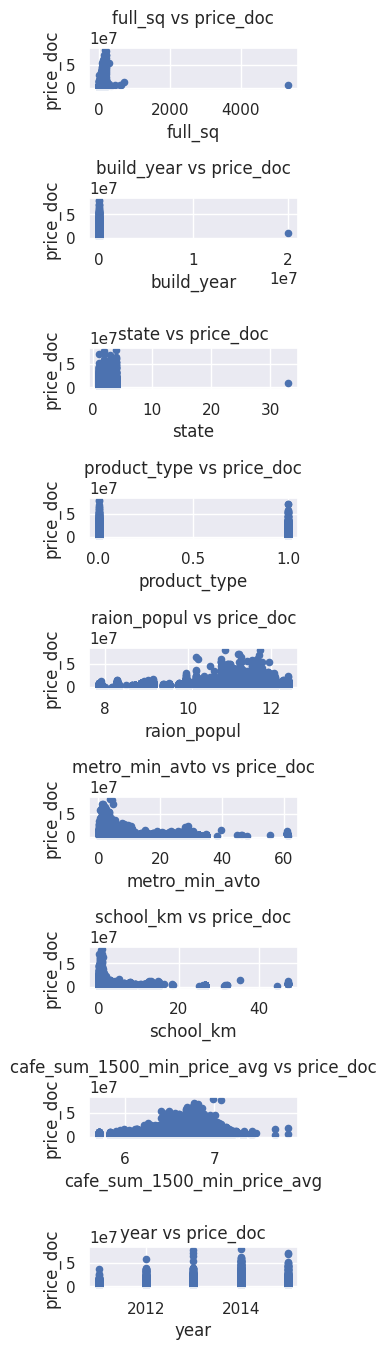

In [ ]:

def plot_feature_vs_price(df, features, width=10, height=5):
    # Количество признаков
    num_features = len(features)

    # Создаем фигуру и оси
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(width, height * num_features))

    # Если один график, axes не будет списком, нужно обработать этот случай
    if num_features == 1:
        axes = [axes]

    # Построение графиков
    for i, feature in enumerate(features):
        df.plot(x=feature, y='price_doc', kind='scatter', ax=axes[i], title=f'{feature} vs price_doc')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('price_doc')

    plt.tight_layout()
    plt.show()


# Выбираем признаки для анализа
features = ['full_sq','build_year', 'state',
       'product_type', 'raion_popul','metro_min_avto',
       'school_km','cafe_sum_1500_min_price_avg', 'year']

# Вызываем функцию с параметрами размера графика
plot_feature_vs_price(df, features, width=3, height=1.5)


Матрица корреляций:

-в центре явно вырисовывается квадрат, где признаки больше коррелируют друг с другом, в дальнейшем можно попробовать их как-то объединить(замечаем, что большинство из них имеют значение расстояния до каких-либо мест)



In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])


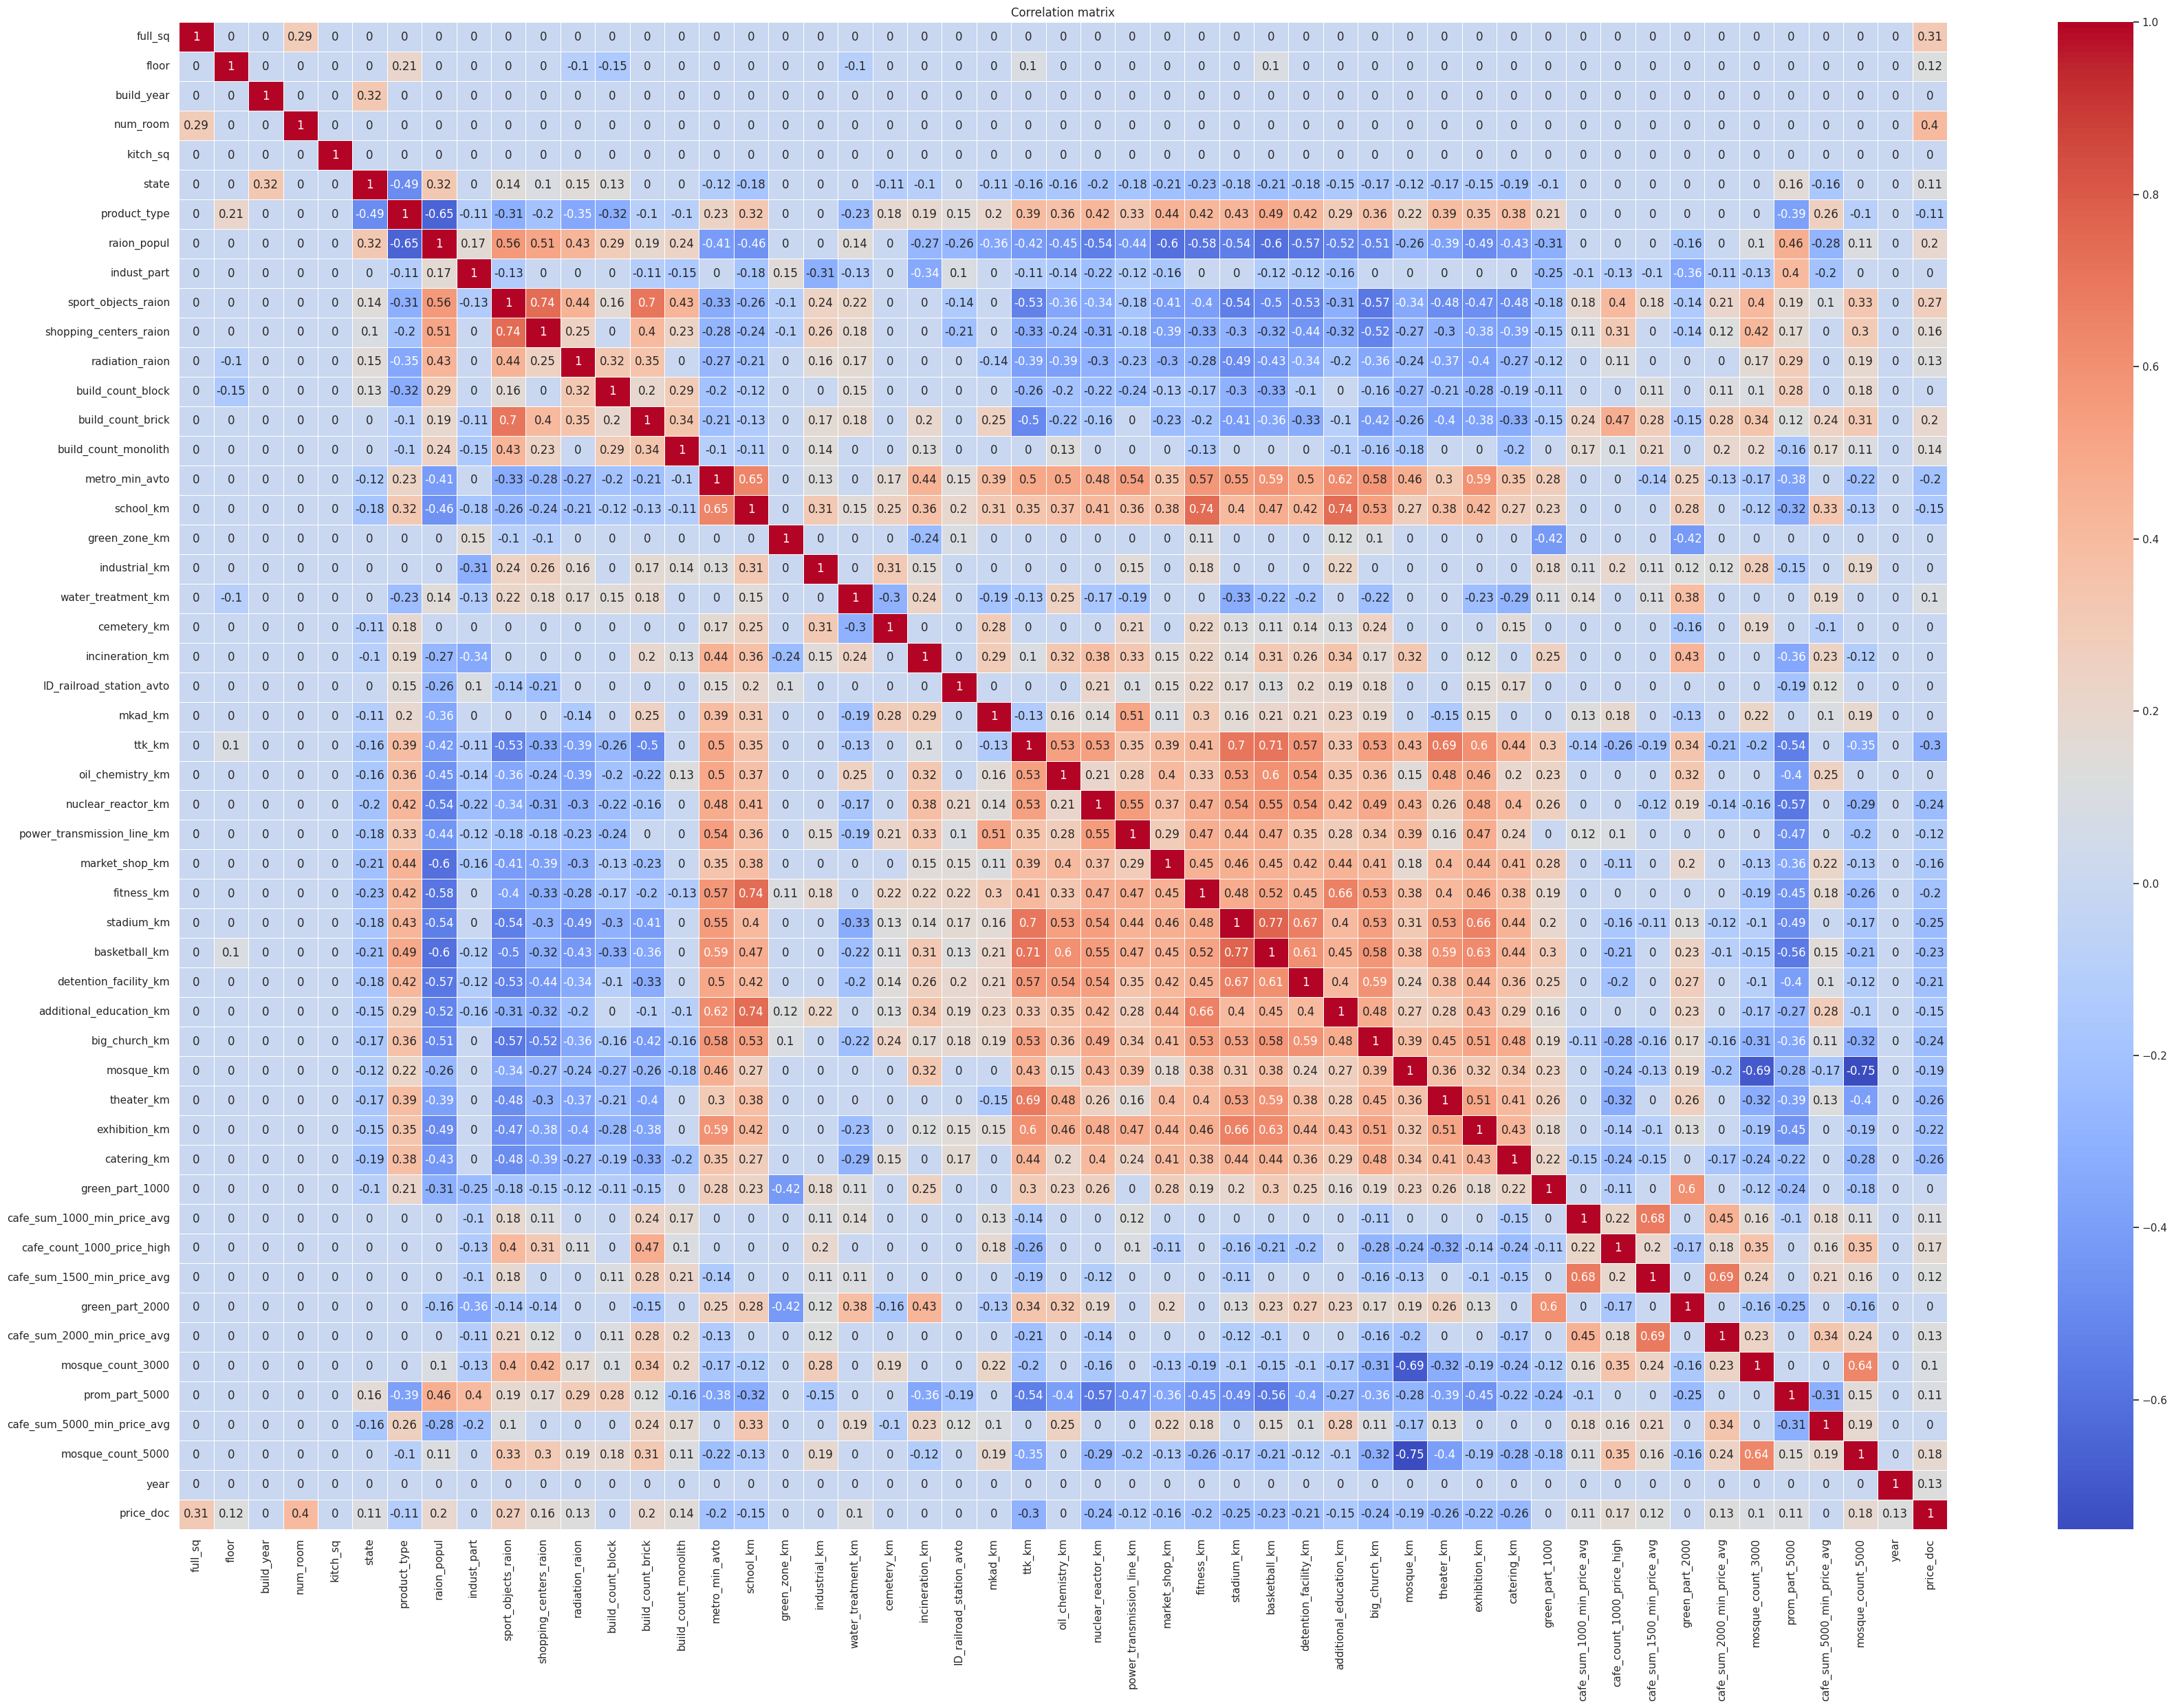

In [ ]:
plt.figure(figsize = (35, 25))
sns.set(font_scale=1)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

С помощью гистограмм тоже можем отследить выбросы для дальнейшей работы с ними. Так, гистограммы "full_sq", "build_year" и "kitch_sq" показывают сильные искажения выбросами.  

Признак "build_count_block" имеет длинный хвост, что тоже навевает на мысль о выбросах или других проблемах при работе с моделями, можно попробовать обрезать его.

Гистограммы "radiation_raion", "mosque_count_3000",  "mosque_count_5000", "year" из-за пустот заставляют задуматься о дополнительной обработке этих признаков(например, бинаризация).


Text(0.5, 1.0, 'histogram')

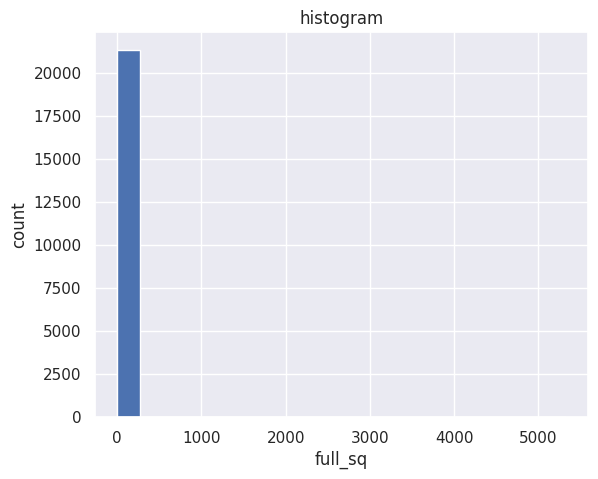

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['full_sq'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('full_sq')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

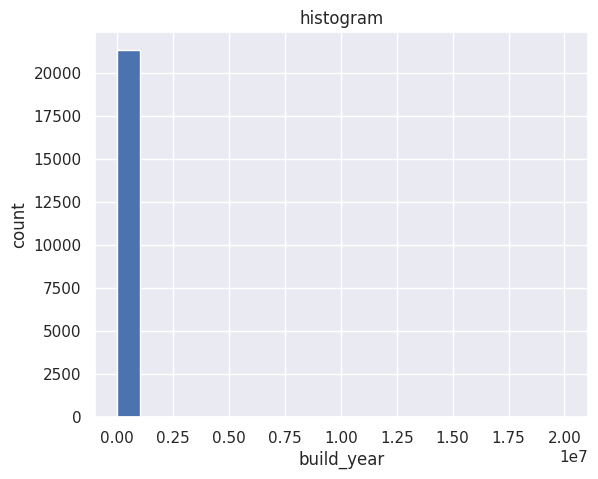

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['build_year'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('build_year')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

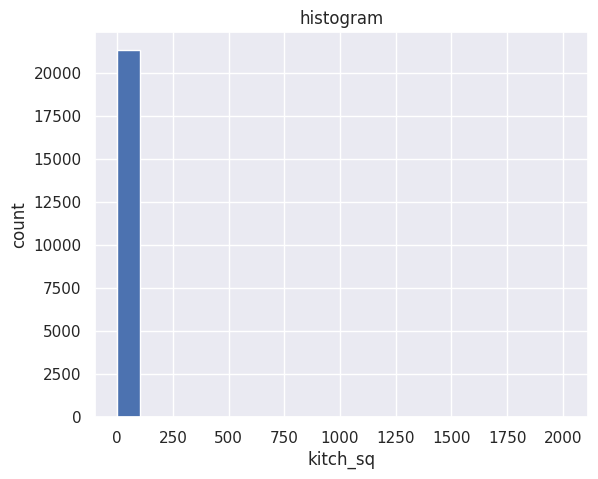

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['kitch_sq'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('kitch_sq')
plt.title('histogram')


Text(0.5, 1.0, 'histogram')

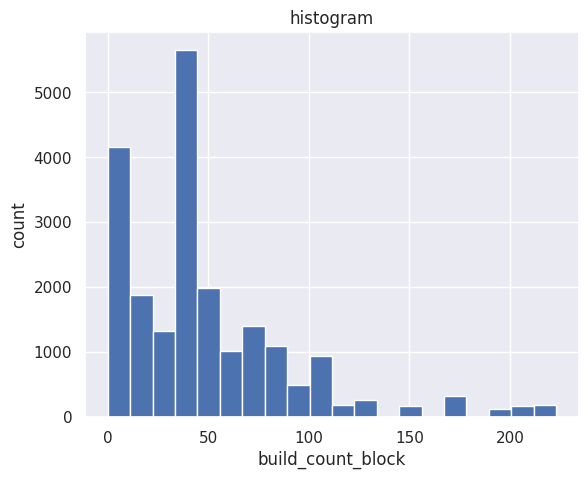

In [ ]:

plt.figure(figsize=(14, 5))

plt.subplot(121)
df['build_count_block'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('build_count_block')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

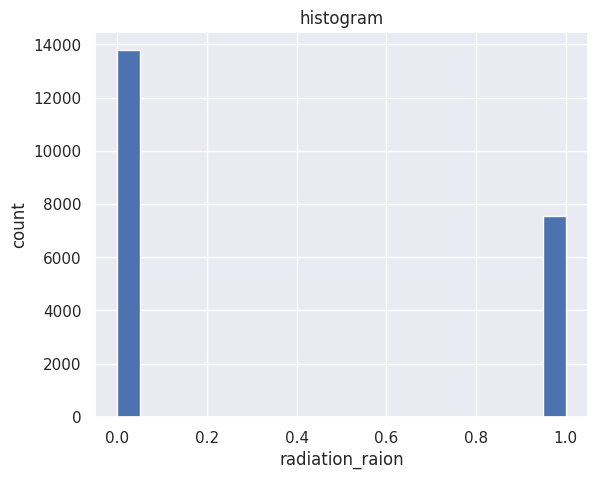

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['radiation_raion'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('radiation_raion')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

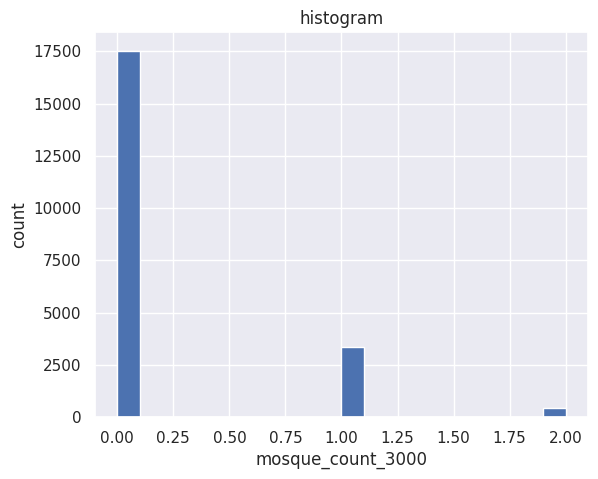

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['mosque_count_3000'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('mosque_count_3000')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

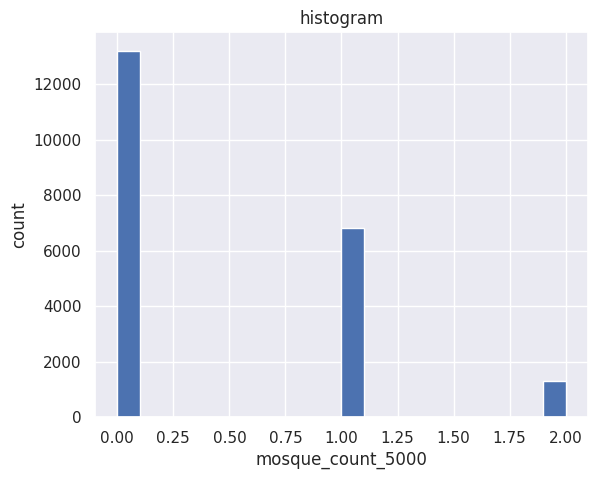

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['mosque_count_5000'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('mosque_count_5000')
plt.title('histogram')

Text(0.5, 1.0, 'histogram')

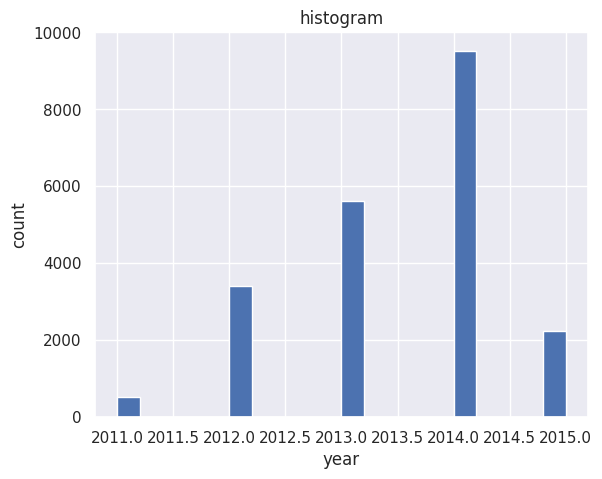

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
df['year'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('year')
plt.title('histogram')

"Ящик с усами"

Более широкие коробки означают большую вариативность.
Медианы показывают центральное значение данных.
Выбросы: точки за пределами усов указывают на экстремальные значения, которые могут требовать дополнительного анализа. Таким образом, мы видим признаки, требующие большего внимания при построении моделей: в большинстве случаев наблюдаются выбросы, где-то вид "ящика с усами" аномален(например:'full_sq', 'build_year', 'num_room', 'kitch_sq', 'state', 'cafe_count_1000_price_high', 'mosque_count_3000')

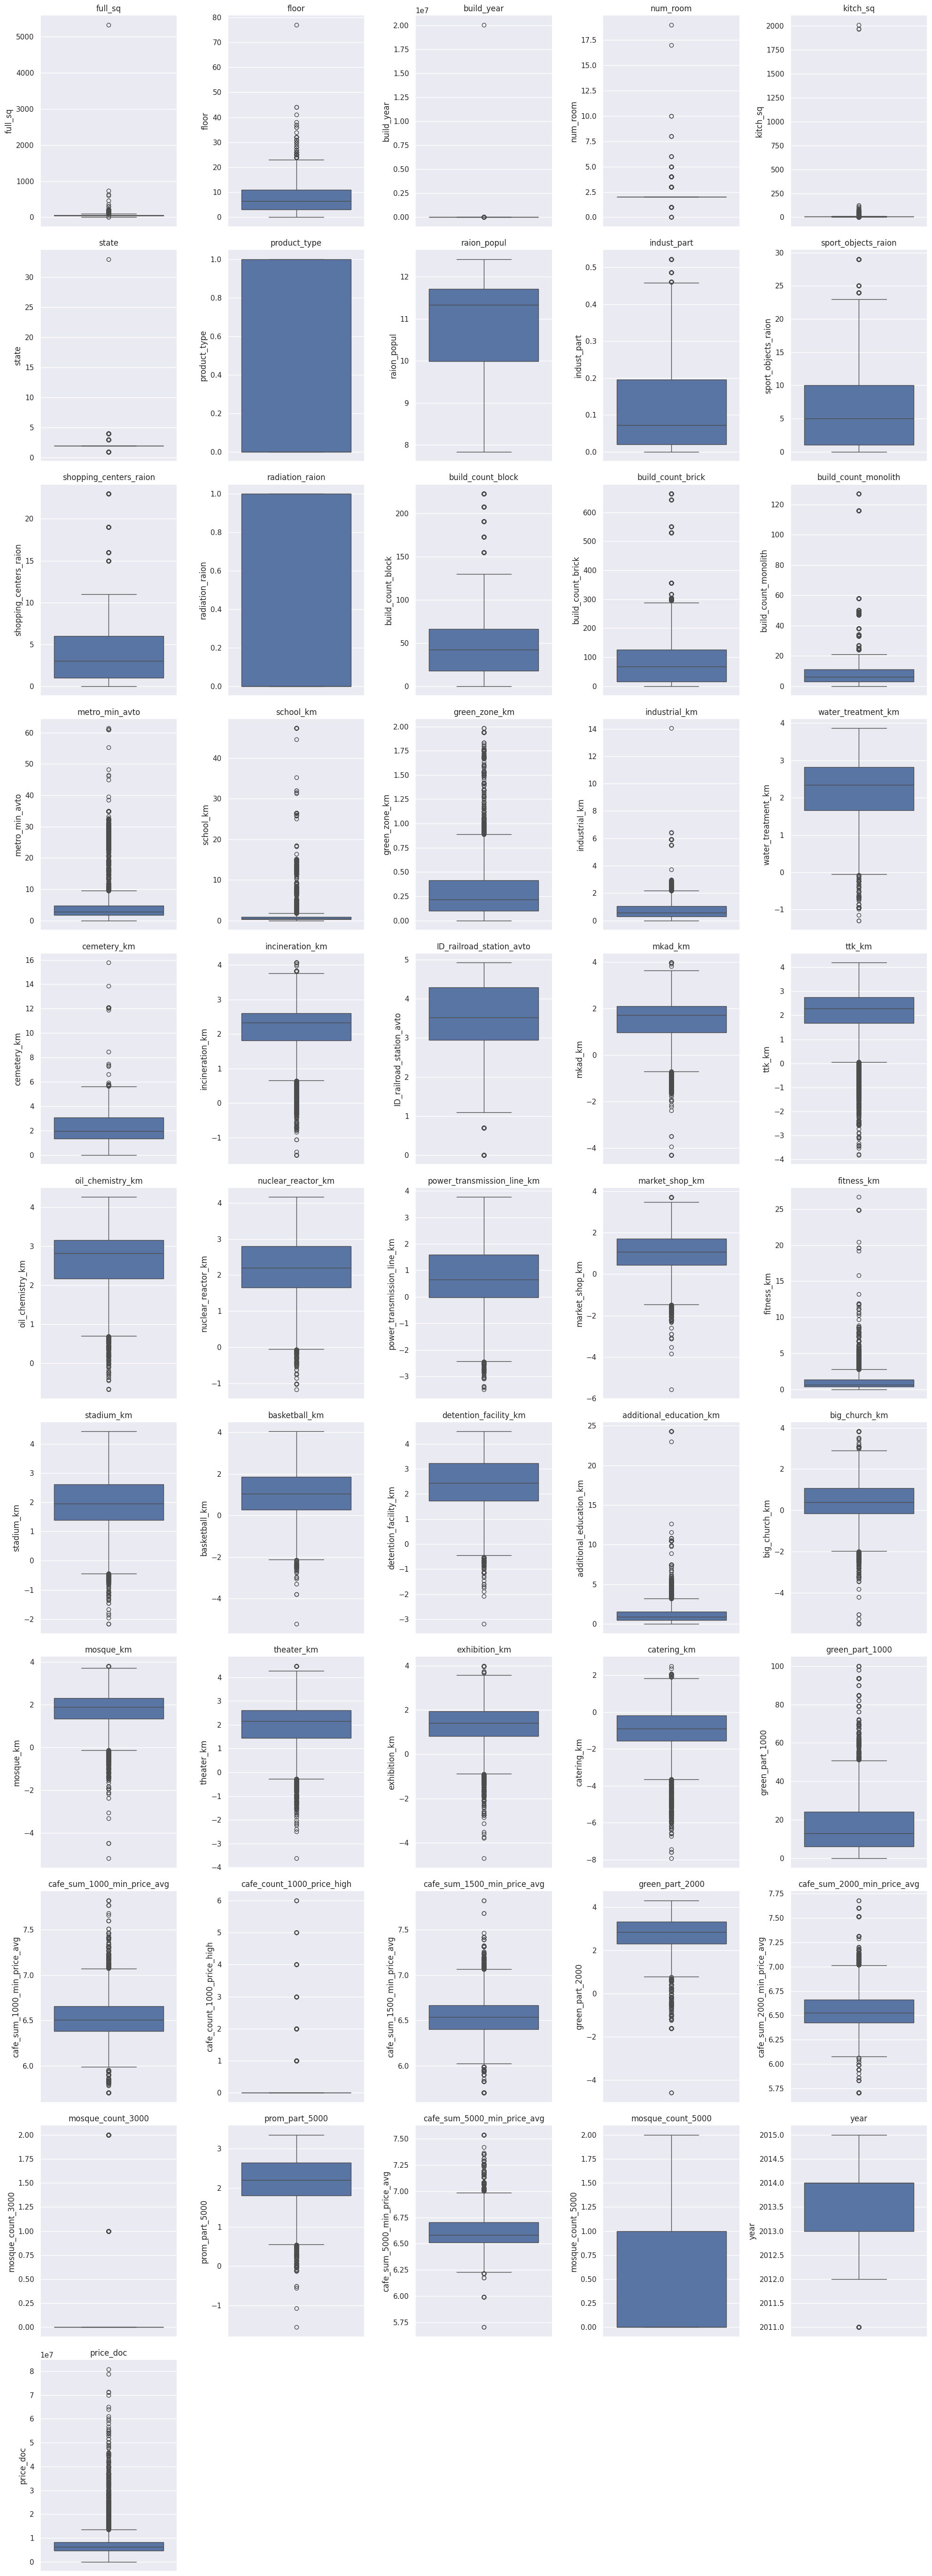

In [ ]:

# Удаление нечисловых столбцов, если такие есть
df_numeric = df.select_dtypes(include=[int, float])

# Построение ящиков с усами на нескольких графиках
num_features = len(df_numeric.columns)
num_cols = 5  # количество столбцов графиков
num_rows = (num_features // num_cols) + 1  # количество строк графиков

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

# Удаление пустых подграфиков
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Итог: наша команда исходя из первичного анализа признаков, например, пыталась бороться с выбросами, заменяя их медианами, результат был неудачным. Пропусков обнаружено не было. Другие преобразования, которые мы использовали при работе с признаками Вы можете увидеть на нашем втором ноутбуке.



